<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch3_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**pip install graphviz pydotplus**

In [10]:
!pip install graphviz pydotplus
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import pydotplus
# import graphviz

Step 1: Create the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Ensure reproducibility
np.random.seed(42)
# Create a dataset with 10 students
data = {
    'Study_Hours': [2, 4, 6, 8, 10, 12, 3, 5, 7, 9],
    'Previous_Exam_Score': [60, 65, 70, 80, 85, 90, 50, 75, 55, 95],
    'Pass/Fail': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1]  # 1: Pass, 0: Fail
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset:\n", df)

# Features: Study_Hours and Previous_Exam_Score
X = df[['Study_Hours', 'Previous_Exam_Score']]

# Labels: Pass/Fail
y = df['Pass/Fail']



Dataset:
    Study_Hours  Previous_Exam_Score  Pass/Fail
0            2                   60          0
1            4                   65          0
2            6                   70          1
3            8                   80          1
4           10                   85          1
5           12                   90          1
6            3                   50          0
7            5                   75          1
8            7                   55          0
9            9                   95          1


Step 2: Fit a decision tree classifier


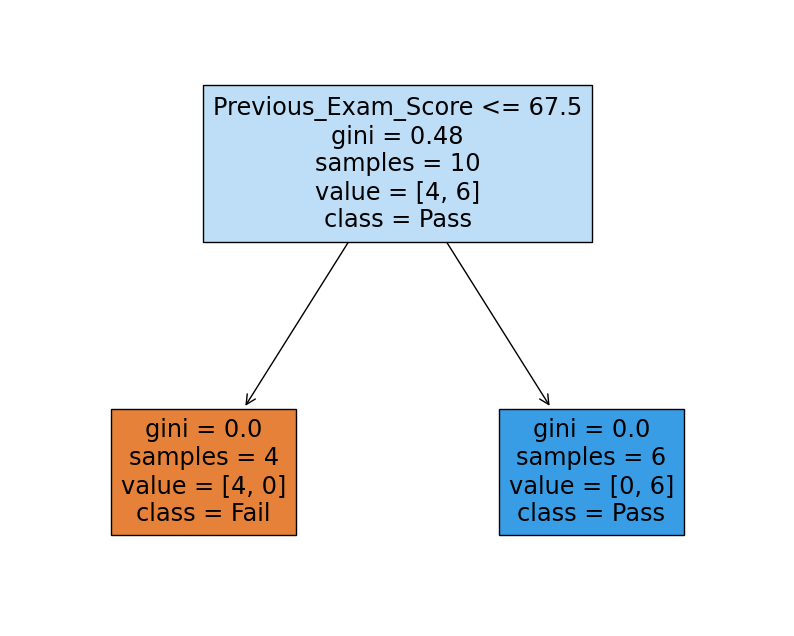

In [4]:
# Initialize the decision tree classifier
# it can be criterion='entropy'
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['Study_Hours', 'Previous_Exam_Score'], class_names=['Fail', 'Pass'], filled=True)
plt.show()


Step 3: Predict the class for a new student

In [25]:
# Predict the class for a new student with 7 study hours and 65 previous exam score
new_student = np.array([[10, 65]])
prediction = clf.predict(new_student)
predicted_class = "Pass" if prediction == 1 else "Fail"

print(f"The predicted class for the new student is: {predicted_class}")


The predicted class for the new student is: Fail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Step 4: Calculate and visualize the decision boundary


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


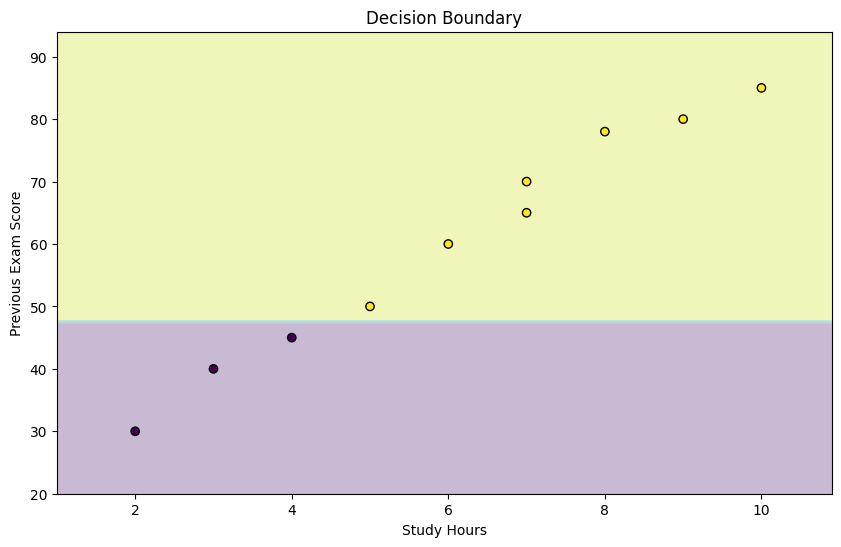

In [6]:
# Define the decision boundary
x_min, x_max = X['Study_Hours'].min() - 1, X['Study_Hours'].max() + 1
y_min, y_max = X['Previous_Exam_Score'].min() - 10, X['Previous_Exam_Score'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X['Study_Hours'], X['Previous_Exam_Score'], c=y, edgecolors='k', marker='o')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.title('Decision Boundary')
plt.show()


Dataset:
    Study_Hours  Previous_Exam_Score  Pass/Fail
0            2                   60          0
1            4                   65          0
2            6                   70          1
3            8                   80          1
4           10                   85          1
5           12                   90          1
6            3                   50          0
7            5                   75          1
8            7                   55          0
9            9                   95          1
Accuracy: 0.50
|--- Study Hours <= 4.00
|   |--- class: 0
|--- Study Hours >  4.00
|   |--- class: 1



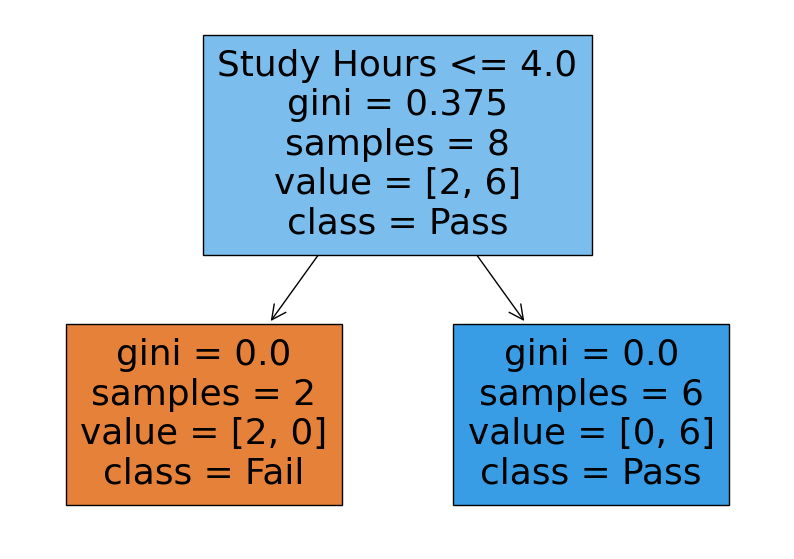

In [32]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a dataset with 10 students
data = {
    'Study_Hours': [2, 4, 6, 8, 10, 12, 3, 5, 7, 9],
    'Previous_Exam_Score': [60, 65, 70, 80, 85, 90, 50, 75, 55, 95],
    'Pass/Fail': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1]  # 1: Pass, 0: Fail
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset:\n", df)

# Features: Study_Hours and Previous_Exam_Score
X = df[['Study_Hours', 'Previous_Exam_Score']]

# Labels: Pass/Fail
y = df['Pass/Fail']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Classifier with study hours as the root node
# The parameter 'max_features=1' forces the tree to consider 'Study Hours' first
clf = DecisionTreeClassifier(random_state=42, max_depth=5, max_features=1)
clf.fit(X_train, y_train)

# Prediction on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the decision tree rules
tree_rules = export_text(clf, feature_names=['Study Hours', 'Previous Exam Scores'])
print(tree_rules)

# Optional: Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=['Study Hours', 'Previous Exam Scores'], class_names=['Fail', 'Pass'], filled=True)
plt.show()


   Student ID  Number of assignments completed  Attendance rate  Previous GPA  \
0           1                               11             0.72          2.42   
1           2                                8             0.55          3.08   
2           3                               12             0.69          3.39   
3           4                                9             0.83          2.46   
4           5                               11             0.83          2.35   

   Study Hours  Previous Passes  Pass/Fail  
0           14                5          1  
1           27                5          1  
2            1                3          0  
3            1                4          0  
4           22                3          1  
Accuracy: 83.33%


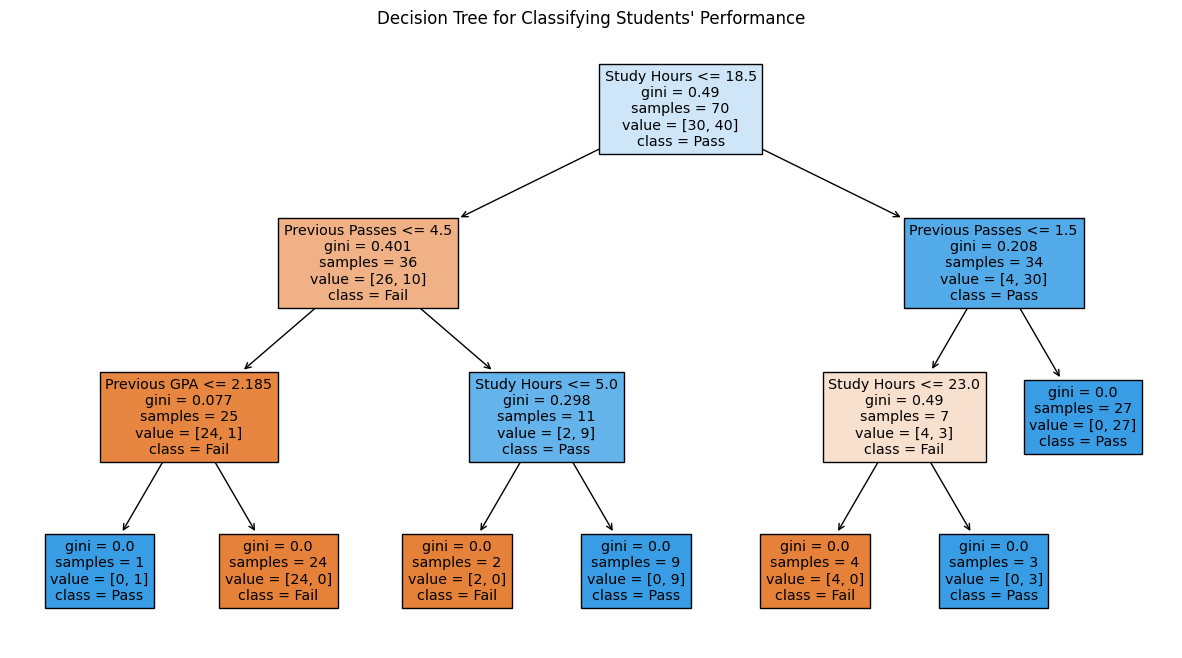

Student 1 with features [10, 0.85, 3.5, 15, 2]: 0
Student 2 with features [5, 0.7, 2.0, 5, 1]: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
df = pd.read_csv(url)
# Inspect the first few rows of the dataset
print(df.head())

# Define features and target
X = df[['Number of assignments completed', 'Attendance rate', 'Previous GPA', 'Study Hours', 'Previous Passes']]
y = df['Pass/Fail']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.title("Decision Tree for Classifying Students' Performance")
plt.show()

# Predict the class of a new student with given features
# [['Number of assignments completed', 'Attendance rate', 'Previous GPA', 'Study Hours', 'Previous Passes']]
new_data = [[10, 0.85, 3.5, 15, 2], [5, 0.7, 2.0, 5, 1]]
predictions = clf.predict(new_data)

# Display the predictions
for i, pred in enumerate(predictions):
    print(f"Student {i+1} with features {new_data[i]}: {pred}")


Practice:  change Maxdept, Entropy, select appropriate features